# A classification problem with directional data

This notebook uses a small, synthetic dataset to demonstrate how the directional data can impact the modeling results.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import geoml

# loading data
point, dirs = geoml.data.Examples.example_fold()
print(point)
print("\n\n")
print(dirs)

Object of class Points2D with 22 data locations

Data preview:

     rock label_1 label_2
0  rock_a  rock_a  rock_a
1  rock_a  rock_a  rock_a
2  rock_a  rock_a  rock_a
3  rock_a  rock_a  rock_a
4  rock_b  rock_b  rock_b



Object of class Directions2D with 7 data locations

Data preview:

Empty DataFrame
Columns: []
Index: []


This dataset is too small for training, so we specify the range parameter manually. You can try changing this value to see the result.

We will make two models, one using the directional data and the other using only the points.

In [3]:
rng = 50

only_points = geoml.models.GPClassif(
                    sp_data=point, var_1="label_1", var_2="label_2", 
                    kernels = [geoml.kernels.GaussianKernel(geoml.transform.Isotropic(rng))])
points_and_directions = geoml.models.GPClassif(
                            sp_data=point, var_1="label_1", var_2="label_2", dir_data = dirs,
                            kernels = [geoml.kernels.GaussianKernel(geoml.transform.Isotropic(rng))])

# coordinates to receive the predictions
grid = geoml.data.Grid2D(start=[0, 0], n=[101, 101], step=[1, 1])
only_points.predict(newdata=grid, name="model_1", verbose=False, n_samples=10000)
points_and_directions.predict(newdata=grid, name="model_2", verbose=False, n_samples=10000)

Now we plot the data points and the directions. The classification model outputs an indicator that is proportional to the probability that a point has to belong to a given class. By contouring this indicator at the value 0 we can see the boundary between the classes. By contouring at other values we can see how the directions influence the result.

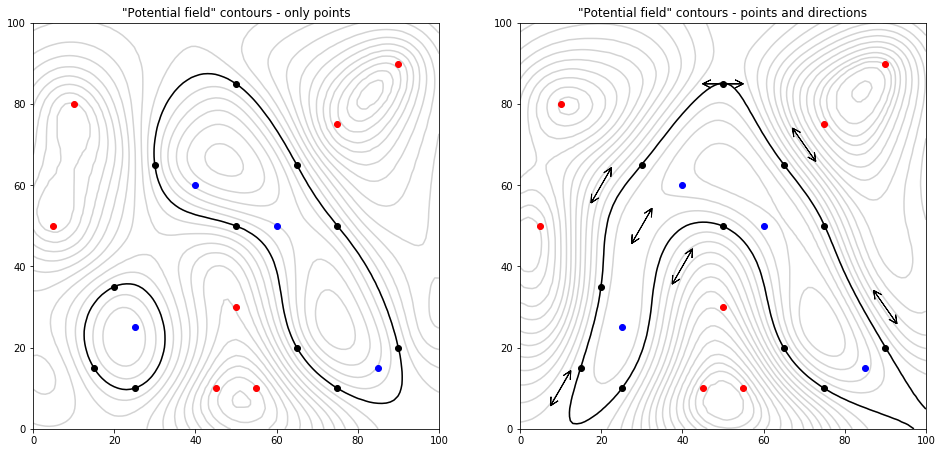

In [4]:
ind_1 = grid.as_image("model_1_rock_a_ind")
ind_2 = grid.as_image("model_2_rock_a_ind")
df_point = point.as_data_frame()
df_dir = dirs.as_data_frame()

fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(1, 2, 1)
ax1.contour(grid.grid[0], grid.grid[1], ind_1, levels=20, colors="lightgray", linestyles="solid")
ax1.contour(grid.grid[0], grid.grid[1], ind_1, levels=np.array([0]), colors="black")
ax1.plot(df_point["X"].values[df_point["rock"] == "rock_a"], df_point["Y"].values[df_point["rock"] == "rock_a"], "bo")
ax1.plot(df_point["X"].values[df_point["rock"] == "rock_b"], df_point["Y"].values[df_point["rock"] == "rock_b"], "ro")
ax1.plot(df_point["X"].values[df_point["rock"] == "boundary"], df_point["Y"].values[df_point["rock"] == "boundary"], "ko")
ax1.set_aspect(1.0)
ax1.set_title('"Potential field" contours - only points')

ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(grid.grid[0], grid.grid[1], ind_2, levels=20, colors="lightgray", linestyles="solid")
ax2.contour(grid.grid[0], grid.grid[1], ind_2, levels=np.array([0]), colors="black")
ax2.plot(df_point["X"].values[df_point["rock"] == "rock_a"], df_point["Y"].values[df_point["rock"] == "rock_a"], "bo")
ax2.plot(df_point["X"].values[df_point["rock"] == "rock_b"], df_point["Y"].values[df_point["rock"] == "rock_b"], "ro")
ax2.plot(df_point["X"].values[df_point["rock"] == "boundary"], df_point["Y"].values[df_point["rock"] == "boundary"], "ko")
# arrows
arrow_length = 3
for i in range(df_dir.shape[0]):
    ax2.arrow(x=df_dir["X"].values[i], y=df_dir["Y"].values[i],
              dx=df_dir["dX"].values[i]*arrow_length, dy=df_dir["dY"].values[i]*arrow_length,
              head_width=2, head_length=2, fill=False, overhang=1, zorder=10)
    ax2.arrow(x=df_dir["X"].values[i], y=df_dir["Y"].values[i],
              dx=-df_dir["dX"].values[i]*arrow_length, dy=-df_dir["dY"].values[i]*arrow_length,
             head_width=2, head_length=2, fill=False, overhang=1, zorder=10)
ax2.set_aspect(1.0)
ax2.set_title('"Potential field" contours - points and directions')

plt.show()

One can also plot the probability for each class label. Let's use `rock_a` as an example:

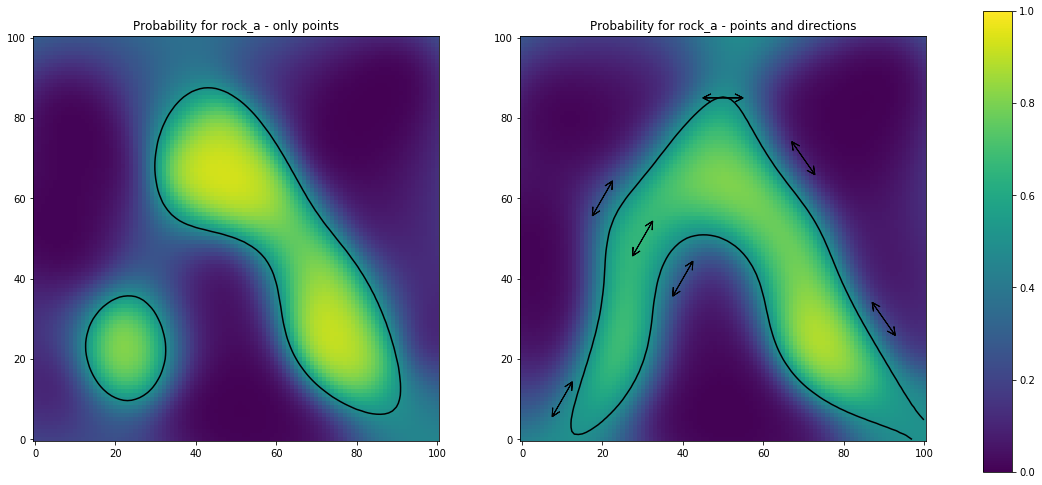

In [5]:
ind_1 = grid.as_image("model_1_rock_a_prob")
ind_2 = grid.as_image("model_2_rock_a_prob")
df_point = point.as_data_frame()
df_dir = dirs.as_data_frame()

fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(1, 2, 1)
im1 = ax1.imshow(ind_1, vmin=0, vmax=1, origin="lower")
#plt.colorbar(im1)
ax1.contour(grid.grid[0], grid.grid[1], grid.as_image("model_1_rock_a_ind"), 
            levels=np.array([0]), colors="black")
ax1.set_aspect(1.0)
ax1.set_title("Probability for rock_a - only points")

ax2 = fig.add_subplot(1, 2, 2)
im2 = ax2.imshow(ind_2, vmin=0, vmax=1, origin="lower")
plt.colorbar(im2, cax=plt.axes([0.95, 0.3, 0.025, 0.4]))
ax2.contour(grid.grid[0], grid.grid[1], grid.as_image("model_2_rock_a_ind"), 
            levels=np.array([0]), colors="black")
# arrows
arrow_length = 3
for i in range(df_dir.shape[0]):
    ax2.arrow(x=df_dir["X"].values[i], y=df_dir["Y"].values[i],
              dx=df_dir["dX"].values[i]*arrow_length, dy=df_dir["dY"].values[i]*arrow_length,
              head_width=2, head_length=2, fill=False, overhang=1, zorder=10)
    ax2.arrow(x=df_dir["X"].values[i], y=df_dir["Y"].values[i],
              dx=-df_dir["dX"].values[i]*arrow_length, dy=-df_dir["dY"].values[i]*arrow_length,
             head_width=2, head_length=2, fill=False, overhang=1, zorder=10)
ax2.set_aspect(1.0)
ax2.set_title("Probability for rock_a - points and directions")

plt.show()

The model also outputs an uncertainty measure (lower is better):

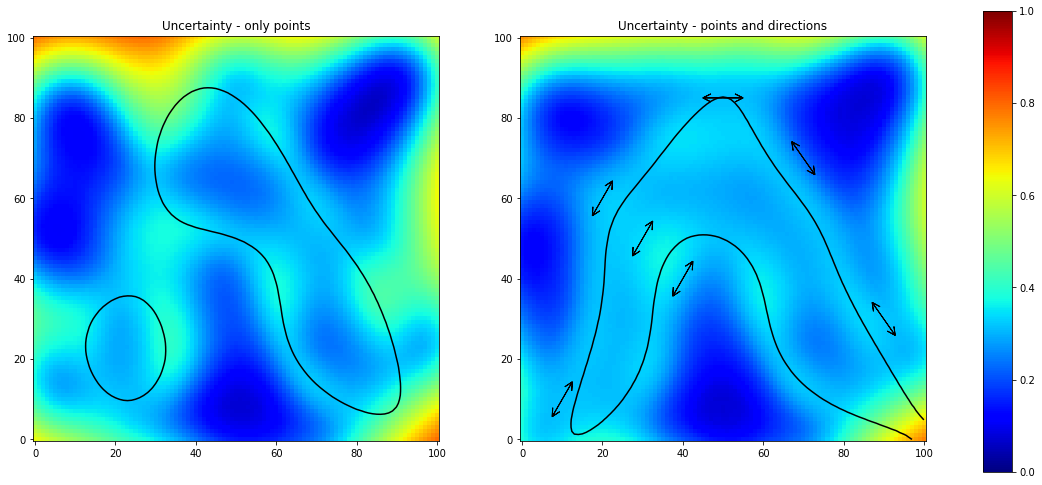

In [6]:
ind_1 = grid.as_image("model_1_uncertainty")
ind_2 = grid.as_image("model_2_uncertainty")
df_point = point.as_data_frame()
df_dir = dirs.as_data_frame()

fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(1, 2, 1)
im1 = ax1.imshow(ind_1, vmin=0, vmax=1, origin="lower", cmap="jet")
#plt.colorbar(im1)
ax1.contour(grid.grid[0], grid.grid[1], grid.as_image("model_1_rock_a_ind"), 
            levels=np.array([0]), colors="black")
ax1.set_aspect(1.0)
ax1.set_title("Uncertainty - only points")

ax2 = fig.add_subplot(1, 2, 2)
im2 = ax2.imshow(ind_2, vmin=0, vmax=1, origin="lower", cmap="jet")
plt.colorbar(im2, cax=plt.axes([0.95, 0.3, 0.025, 0.4]))
ax2.contour(grid.grid[0], grid.grid[1], grid.as_image("model_2_rock_a_ind"), 
            levels=np.array([0]), colors="black")
# arrows
arrow_length = 3
for i in range(df_dir.shape[0]):
    ax2.arrow(x=df_dir["X"].values[i], y=df_dir["Y"].values[i],
              dx=df_dir["dX"].values[i]*arrow_length, dy=df_dir["dY"].values[i]*arrow_length,
              head_width=2, head_length=2, fill=False, overhang=1, zorder=10)
    ax2.arrow(x=df_dir["X"].values[i], y=df_dir["Y"].values[i],
              dx=-df_dir["dX"].values[i]*arrow_length, dy=-df_dir["dY"].values[i]*arrow_length,
             head_width=2, head_length=2, fill=False, overhang=1, zorder=10)
ax2.set_aspect(1.0)
ax2.set_title("Uncertainty - points and directions")

plt.show()

It can be seen that the directional data helps to model the shape of the geological feature.

## References

Lajaunie, C., Courrioux, G., & Manuel, L. (1997). Foliation fields and 3D cartography in geology: Principles of a method based on potential interpolation. Mathematical Geology, 29(4), 571–584. https://doi.org/10.1007/BF02775087

Gonçalves, Í. G., Kumaira, S., & Guadagnin, F. (2017). A machine learning approach to the potential-field method for implicit modeling of geological structures. Computers & Geosciences, 103(March 2017), 173–182. https://doi.org/10.1016/j.cageo.2017.03.015